In [1]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
import numpy as np
import copy

from src.nqs import RBM, RandomHamiltonian, IsingHamiltonian, IsingHamiltonianReduced
import src.utils as utils
from config_parser import get_config_file

import matplotlib.pyplot as plt
%matplotlib notebook

In [12]:

seed = 42  # Seed for random number generator

error_array = []
steps_array = []
target_list =[]

for v in [2,5,9,12]:
    visible_size = v
    hidden_size = v
    error_list = []
    steps_list=[]

    
    
    H = IsingHamiltonianReduced(n=visible_size)
    
    for i in range(1,7):
        walker_steps = 100*4**i
        np.random.seed(seed)
        rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=H, walker_steps=walker_steps)
        

        mcmc, _ = np.histogram([utils.binary_array_to_int(state) for state in rbm.mcmc_dist()], 
                 density=True, 
                 bins=range(2**visible_size+1))
        exact= rbm.probability_dist()
        exact = exact.reshape(-1)
        #error = utils.rms_error(exact,mcmc)/(max(exact)-min(exact))
        error = utils.prob_error
        error_list.append(error)
        
        print(f"Visible_size: {v}, error: {error_list[-1]}")
        
     
        if i == 6:
            error_array.append(error_list)
            steps_array = [10* j for j in range(1, i)]
            target_list.append(i)
            
            
            break


Visible_size: 2, error: 0.1153751046133866
Visible_size: 2, error: 0.023790308773159803
Visible_size: 2, error: 0.024397295840226818
Visible_size: 2, error: 0.005975316226840284
Visible_size: 2, error: 0.004663957886613456
Visible_size: 2, error: 0.0008746935262206636
Visible_size: 5, error: 0.1286502240827117
Visible_size: 5, error: 0.11051041901486515
Visible_size: 5, error: 0.046410608709720885
Visible_size: 5, error: 0.026192729299645667
Visible_size: 5, error: 0.012893732577461108
Visible_size: 5, error: 0.004608820858828018
Visible_size: 9, error: 0.667257025417207
Visible_size: 9, error: 0.31918545322779246
Visible_size: 9, error: 0.16481303600291958
Visible_size: 9, error: 0.0670438849037515
Visible_size: 9, error: 0.03898113244404342
Visible_size: 9, error: 0.016964023817670235
Visible_size: 12, error: 0.526509667558363
Visible_size: 12, error: 0.21134131182031884
Visible_size: 12, error: 0.18576189674078503
Visible_size: 12, error: 0.09653207234723475
Visible_size: 12, error:

<IPython.core.display.Javascript object>


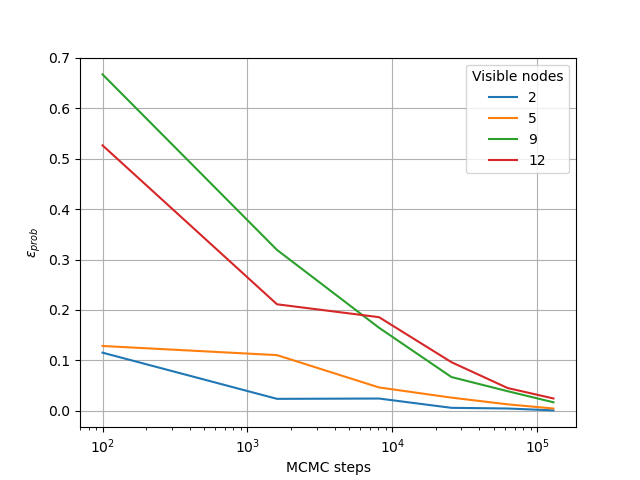

In [16]:
plt.figure(0)

#yint = range(min(), math.ceil(visible_list))+1)
#plt.yticks(yint)
labels=[]
for errors in error_array:
    plt.semilogx([100*j**4 for j in range(1, 7)], errors)

plt.legend([i for i in [2,5,9,12]],title = "Visible nodes")

plt.ylabel(r'$\epsilon_{prob}$')
plt.xlabel("MCMC steps")
plt.grid()

In [17]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}/MCMC Ising-accuracy by steps.pdf"

plt.savefig(f"{path}",bbox_inches = "tight")